In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

C:\Users\vivek\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv("C:/Study/DataScience/Kaggle/drug200.csv")

In [3]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
### Lets check the shape of our dataset
df.shape

(200, 6)

In [5]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [6]:
## Lets check the null values in our dataset
df.isnull().sum()
## There are no null values

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [8]:
df['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugB    16
drugC    16
Name: Drug, dtype: int64

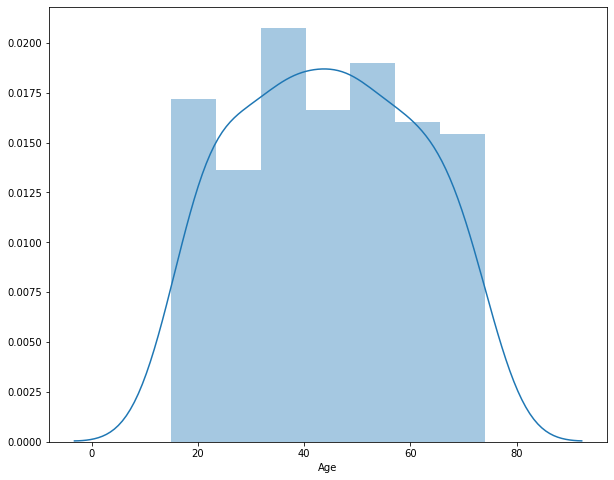

In [9]:
### Lets do Univariate Analysis with our dataset

plt.figure(figsize=(10,8))
sns.distplot(df['Age'])
plt.show()

(array([ 6.,  4.,  6.,  6., 11.,  5.,  7.,  3., 10.,  5.,  7.,  8.,  9.,
         8.,  4.,  6., 10., 12.,  6.,  4.,  6.,  9.,  8.,  6.,  4.,  6.,
         8.,  6.,  4.,  6.]),
 array([15.        , 16.96666667, 18.93333333, 20.9       , 22.86666667,
        24.83333333, 26.8       , 28.76666667, 30.73333333, 32.7       ,
        34.66666667, 36.63333333, 38.6       , 40.56666667, 42.53333333,
        44.5       , 46.46666667, 48.43333333, 50.4       , 52.36666667,
        54.33333333, 56.3       , 58.26666667, 60.23333333, 62.2       ,
        64.16666667, 66.13333333, 68.1       , 70.06666667, 72.03333333,
        74.        ]),
 [<matplotlib.patches.Polygon at 0x2247809a5c8>])

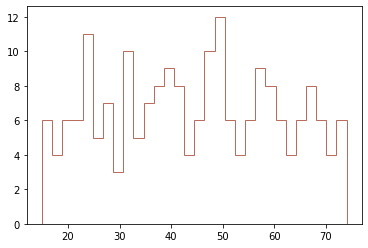

In [10]:
plt.hist(x='Age',bins=30,histtype='step',color='#BA6C5D',data=df)
###We can observe that in our dataset ,age b/w 45-50 are more

<AxesSubplot:xlabel='Sex', ylabel='count'>

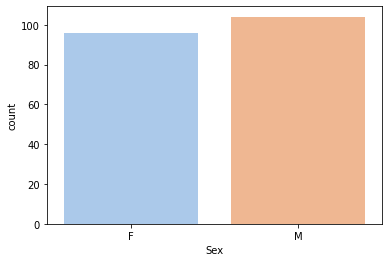

In [11]:
## Lets check the Age column
sns.countplot(x='Sex',palette='pastel',orient='v',data=df)
## In our dataset the category Male are slightly more than female category

<AxesSubplot:xlabel='BP', ylabel='count'>

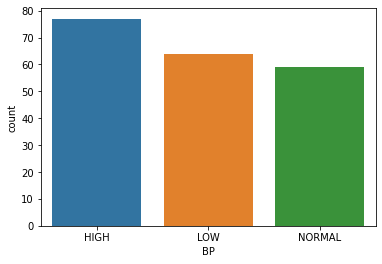

In [12]:
# Lets check BP column
sns.countplot(x='BP',data=df)
## People with high BP are more in the dataset

<AxesSubplot:xlabel='Cholesterol', ylabel='count'>

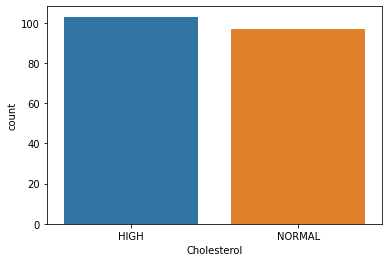

In [13]:
## Lets check Cholesterol
sns.countplot(x='Cholesterol',data=df)
## Cholesterol is also balanced but high Cholesterol level people are a bit more

<AxesSubplot:xlabel='Drug', ylabel='count'>

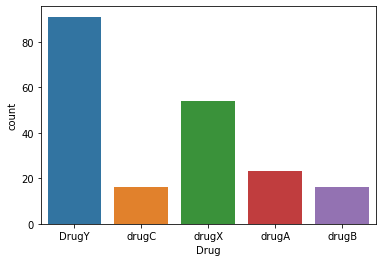

In [14]:
## Lets check our output variable : Drug

sns.countplot(x='Drug',data=df)
## Drug Y dataset is more than other datasets. So our dataset is an unbalanced dataset.It is better to apply oversampling techniques

In [15]:
### Bi-Variate analysis
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


<AxesSubplot:xlabel='Age', ylabel='Drug'>

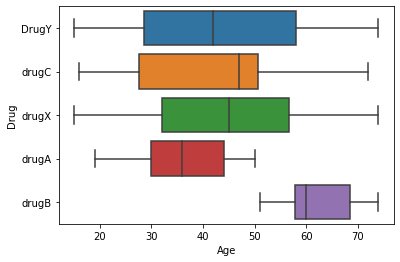

In [16]:
## Age and Target variable
sns.boxplot(x='Age',y='Drug',orient="h",data=df)

## Drug B was used by age group b/w 50-70, Drug A was used by age group b/w 20-50.
## Where as Drug Y is being used from all the ages in this dataset.

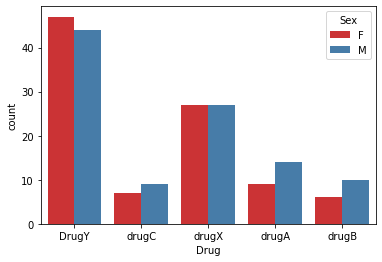

In [17]:
###Sex and Drug
ax = sns.countplot(x='Drug', hue="Sex",palette="Set1", data=df)
## Male  gets  drugA, drugB and drugC more than female.
## drugX is equal for male and female people

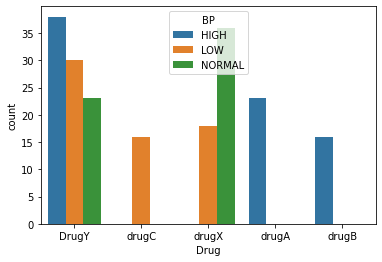

In [18]:
## BP and Drug
ax = sns.countplot(x='Drug', hue="BP", data=df)
# Drug A and Drug B for people with high Blood Pressure
## Drug X is not taken by High BP people
### Drug C is only taken by people with low Blood Pressure 

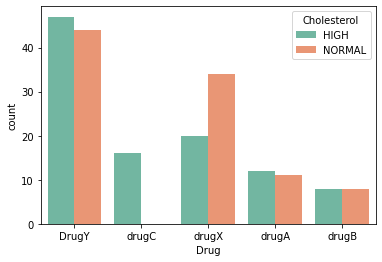

In [19]:
##Drug and Cholesterol
ax = sns.countplot(x='Drug', hue="Cholesterol", palette="Set2",data=df)
# Drug Y is more used by high cholesterol and normal people
## Where as Drug C is only for the people with high cholesterol

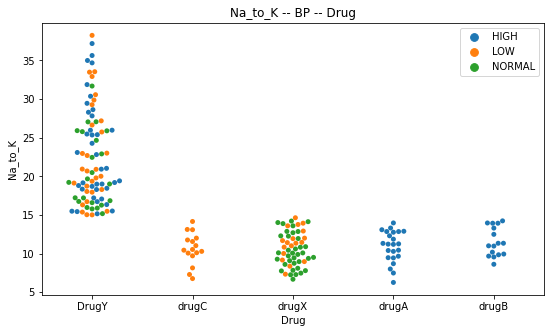

In [20]:
### Na_k and Drug
plt.figure(figsize = (9,5))
sns.swarmplot(x = "Drug", y = "Na_to_K",hue="BP",data = df)
plt.legend()
plt.title("Na_to_K -- BP -- Drug")
plt.show()

In [21]:
na_to_k_groups = []
for i in df['Na_to_K']:
    if i <= 10:
        na_to_k_groups.append('5-10')
    if i > 10 and i <= 15:
        na_to_k_groups.append('10-15')
    if i > 15 and i <= 20:
        na_to_k_groups.append('15-20')
    if i > 20 and i <= 25:
        na_to_k_groups.append('20-25')
    if i > 25 and i <= 30:
        na_to_k_groups.append('25-30')
    if i > 30:
        na_to_k_groups.append('30+')
        
df['Na_to_K_groups'] = na_to_k_groups

In [22]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Na_to_K_groups
0,23,F,HIGH,HIGH,25.355,DrugY,25-30
1,47,M,LOW,HIGH,13.093,drugC,10-15
2,47,M,LOW,HIGH,10.114,drugC,10-15
3,28,F,NORMAL,HIGH,7.798,drugX,5-10
4,61,F,LOW,HIGH,18.043,DrugY,15-20


In [23]:
from sklearn.preprocessing import LabelEncoder

def label_encoder(y):
    le = LabelEncoder()
    df[y] = le.fit_transform(df[y])

In [24]:
label_list = ["Sex","BP","Cholesterol","Na_to_K","Na_to_K_groups","Drug"]

for l in label_list:
    label_encoder(l)

In [25]:
df.drop(['Na_to_K'], axis=1, inplace=True)

In [26]:
df.head()

,Age,Sex,BP,Cholesterol,Drug,Na_to_K_groups
0,23,0,0,0,0,3
1,47,1,1,0,3,0
2,47,1,1,0,3,0
3,28,0,2,0,4,5
4,61,0,1,0,0,1


In [27]:
from sklearn.model_selection import train_test_split

X = df.drop(['Drug'],axis=1)
y = df.Drug

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 42,shuffle=True)

In [28]:
X_train

,Age,Sex,BP,Cholesterol,Na_to_K_groups
169,20,0,0,0,0
97,56,0,0,0,3
31,74,1,0,0,5
12,43,1,1,0,1
35,46,1,2,1,5
...,...,...,...,...,...
106,22,1,2,0,0
14,50,0,2,0,0
92,29,0,0,0,3
179,67,0,2,0,1


In [29]:
pip install "imbalanced_learn==0.6.2"

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\vivek\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [31]:
from imblearn.over_sampling import SMOTE
X_train,y_train = SMOTE().fit_resample(X_train,y_train)

In [37]:
X_train

,Age,Sex,BP,Cholesterol,Na_to_K_groups
0,20,0,0,0,0
1,56,0,0,0,3
2,74,1,0,0,5
3,43,1,1,0,1
4,46,1,2,1,5
...,...,...,...,...,...
320,62,0,1,1,0
321,39,0,1,1,0
322,58,0,2,0,1
323,57,1,2,0,5


In [44]:
## Lets apply Logistic Regression first
from sklearn import linear_model, naive_bayes, neighbors, svm
log_reg = linear_model.LogisticRegression(max_iter = 7000)
log_reg.fit(X_train, y_train)
log_reg_acc = 100*log_reg.score(X_test, y_test)
print('Logistic Regression Predictions: \n', log_reg.predict(X_test), '\n Accuracy:', log_reg_acc, '%')

Logistic Regression Predictions: 
 [4 1 4 3 0 1 1 4 1 4 1 4 3 1 2 3 2 4 0 4 2 0 0 4 4 4 3 4 1 4 4 0 3 4 0 1 2
 1 1 1 4 4 4 0 4 3 3 0 2 4 4 4 4 2 4 4 0 1 4 0] 
 Accuracy: 51.66666666666667 %


In [47]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
accuracies = cross_val_score(knn, X_train, y_train, cv=5)
knn.fit(X_train,y_train)

print("Train Score:",np.mean(accuracies))


Train Score: 0.6215384615384616


In [48]:
print("Test Score:",knn.score(X_test,y_test))

Test Score: 0.35


In [53]:
grid = {'n_neighbors':np.arange(1,120),
        'p':np.arange(1,3),
        'weights':['uniform','distance']
       }

knn = KNeighborsClassifier(algorithm = "auto")
knn_cv = GridSearchCV(knn,grid,cv=5)
knn_cv.fit(X_train,y_train)

print("Hyperparameters:",knn_cv.best_params_)

Hyperparameters: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}


In [57]:
knn = KNeighborsClassifier(algorithm = "auto",n_neighbors=5,p=1,weights='distance')

In [58]:
knn.fit(X_train,y_train)

KNeighborsClassifier(p=1, weights='distance')

In [59]:
knn.score(X_test,y_test)

0.4666666666666667

In [60]:
knn.score(X_train,y_train)

0.9969230769230769